# Longueur des planches de skateboard

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Le dataset 

Imaginons que nous arrivions à mesurer la longueurs de toutes les planches de skate de bordeaux. Cela représenterai 10 000 mesures. Pour les besion de l'exercice simulons ce dataset:

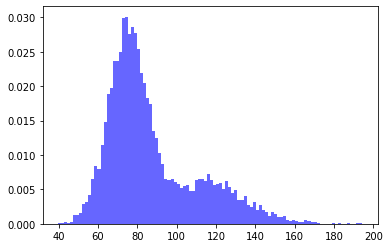

In [138]:
# Générer un dataset aléatoire de mesures de longueurs de planches
data1 = np.random.normal(75, 10, 7000)  # skateboard
data2 = np.random.normal(115, 20, 3000) # longboard
data = np.concatenate((data1,data2))
plt.hist(data, bins=100, density=True, alpha=0.6, color='b');

## Les grandeurs statistiques de la population totale

Définir 
- N : La taille de la population
- mean_tot : la moyenne de la population totale
- std_tot : l'écart type de la population totale

In [139]:
N = len(data)
mean_tot = data.mean()
std_tot = data.std()
print(f"N: {N}, Meantot: {mean_tot}, Stdtot: {std_tot}")

N: 10000, Meantot: 87.0617669404012, Stdtot: 22.978499890269187


## Les grandeurs statistiques de échantillon "Darwin"

Nous nous interessons maintenant uniquement un échantillon de cette population : Les skateboards du skatepark de Darwin afin de voir si nous pouvons extrapoler des informations sur la population globale. Encore une fois nous allons simuler cet échantillon pour les besoin de l'exercice.

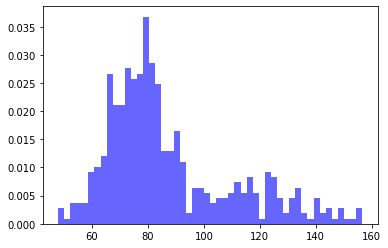

In [140]:
n = 500
sample = np.random.choice(data, n, replace=True)
plt.hist(sample, bins=50, density=True, alpha=0.6, color='b');

Définir 
- N : La taille de la population
- mean_sample_500 : la moyenne de cet échantillon
- std_sample_500 : l'écart type de cet échantillon

In [141]:
mean_sample_500 = sample.mean()
std_sample_500 = sample.std()
print(f"N: {n}, Mean_sample: {mean_sample_500}, Std_sample: {std_sample_500}")

N: 500, Mean_sample: 87.1254488376495, Std_sample: 22.609389725866023


Cet échantillon a t'il des grandeurs statistiques proches de la population globale?

### La longueur moyenne estimée des planches de skateboard

Imaginons que nous n'ayons pas à notre disposition la population totale.
Donner la valeur moyenne des planches de skateboard estimée à partir de l'échantillon précédent. Donner une incertitude avec un intervalle de confiance à 99,7%. Pour ce faire vous aurez besoin de calculer la standard error que nous appelerons "ste_sample_500".

In [142]:
ste_sample_500 = std_sample_500 / np.sqrt(n)
ste_sample_500

1.0111226471364352

La valeur réelle de la moyenne est elle bien en accord avec estimation? 

In [143]:
print(f"Mean tot: {mean_tot}, meansample 99,7% confiance: {mean_sample_500} +- {ste_sample_500*3}")

Mean tot: 87.0617669404012, meansample 99,7% confiance: 87.1254488376495 +- 3.0333679414093053


## Les grandeurs statistiques de échantillon "Les quais"

Nous nous interessons maintenant uniquement un autre échantillon de cette population : Les skateboards du skatepark des quais afin de voir, encore une fois si nous pouvons extrapoler des informations sur la population globale. Encore une fois nous allons simuler cet échantillon pour les besoin de l'exercice.

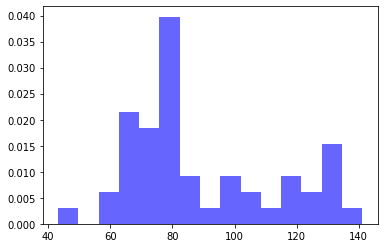

In [144]:
n = 50
sample = np.random.choice(data, n, replace=True)
plt.hist(sample, bins=15, density=True, alpha=0.6, color='b');

Encore une fois, imaginons que nous n'ayons pas à notre disposition la population totale.
Donner la valeur moyenne des planches de skateboard estimée à partir de l'échantillon précédent. Donner une incertitude avec un intervalle de confiance à 99,7%. Pour ce faire vous aurez besoin de calculer la standard error que nous appelerons "ste_sample_50".

In [145]:
mean_sample_50 = np.mean(sample)
ste_sample_50 = sample.std() / 50**0.5
ste_sample_50

3.3387486641419515

La valeur réelle de la moyenne est elle bien en accord avec estimation? 
Si oui quelle est la meilleur estimation de la moyenne totale: l'estimation issues de l'échantillon de Darwin ou de celui des quais ? Pourquoi?

In [146]:
# L'échantillon Darwin est plus fourni que celui des quais, l'estimation des quais est bonne mais trop imprécise 

## Evolution de la standard error en fonction de la taille de l'échantillon

Dans cette partie nous allons illustrer comment varie la l'erreur standard en fonction de la taille de l'échantillon

Prenons 1000 échantillons indépendants. Chaque échantillon contient n = 500 mesures. Pour chacun de ces échantillons, calculons la moyenne de l'échantillon. Nous stockons toutes ces moyennes dans une liste "means" :

In [147]:
n = 500
means = []
for i in range(1000):
    sample = np.random.choice(data, n, replace=True)
    means.append(sample.mean())

Visualiser la distribution de cette population de moyennes avec un histogramme

(array([  9.,  30.,  76., 141., 247., 231., 160.,  70.,  30.,   6.]),
 array([83.77893267, 84.43028261, 85.08163255, 85.73298249, 86.38433243,
        87.03568236, 87.6870323 , 88.33838224, 88.98973218, 89.64108212,
        90.29243206]),
 <BarContainer object of 10 artists>)

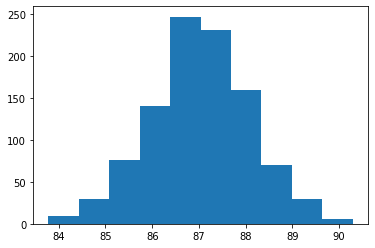

In [148]:
plt.hist(means)

Calculer la moyenne et l'écart type de cette population de moyennes que nous appelerons respectivement "mean_est_500" et "ste_est_500".

In [149]:
mean_est_500 = np.mean(means)
ste_est_500 = np.std(means)
ste_est_500

1.0693819438095924

Comparer les valeurs ("mean_sample_500", "ste_sample_500") et ("mean_est_500" et "ste_est_500")

In [150]:
f"{mean_sample_500}, {ste_sample_500} and {mean_est_500}, {ste_est_500}"

'87.1254488376495, 1.0111226471364352 and 87.02865293014241, 1.0693819438095924'

Répéter l'opération avec un n=50 :

In [151]:
n = 50
means = []
for i in range(1000):
    sample = np.random.choice(data, n, replace=True)
    means.append(sample.mean())

Calculer la moyenne et l'écart type de cette population de moyennes que nous appelerons respectivement "mean_est_50" et "ste_est_50".

In [152]:
mean_est_50 = np.mean(means)
ste_est_50 = np.std(means)

Comparer les valeurs ("mean_sample_50", "ste_sample_50") et ("mean_est_50" et "ste_est_50")

In [153]:
f" {mean_sample_500}, {ste_sample_50} and {mean_est_50}, {ste_est_50} "

' 87.1254488376495, 3.3387486641419515 and 87.00805981410525, 3.328328703795008 '

## Evolution de la standar error en fonction de la taille de l'échantillon (optionnel)

Nous constatons l'incertitude (et donc la ste) de notre estimation varie avec la taille n de l'échantillon. Et nous avons vu qu'il exite deux manière de retrouver cette ste (la méthode "$sample$" et la méthode "$est$").

Définisser la ste_est et la ste_sample pour chaque valeur n de la liste suivante :

In [154]:
sample_lens = np.arange(50, 500, 1)

In [155]:
ste_est, ste_sample = [], []
for n in sample_lens:
    #Init means for ste_est
    means = []
    #Calc Sample
    sample = np.random.choice(data, n, replace=True)
    ste_sample.append(np.std(sample) / np.sqrt(n))
    #Create means and append ste_est
    for i in range(1000):
        sample = np.random.choice(data, n, replace=True)
        means.append(sample.mean())
    ste_est.append(np.std(means))
    

En tracant ces $ste$ en fonction des $n$ précédants vous devriez trouver le résultat suivant :

<img src="ste_func_n.png">

Pour quelle valeur de $n$ trouve t'on une $ste = 1.5 cm$ (et donc une $incertitude = \pm 3cm $ avec in intervalle de confiance de 95%)?

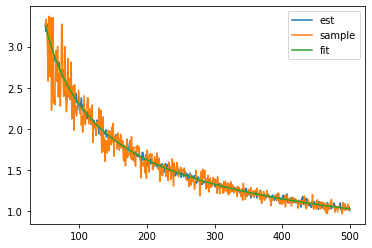

In [156]:
x = np.linspace(50,500, num=450)
plt.figure
plt.plot(x,ste_est, label = 'est')
plt.plot(x,ste_sample, label = 'sample')
plt.plot(x, std_tot/x**0.5, label='fit')
plt.legend()

235


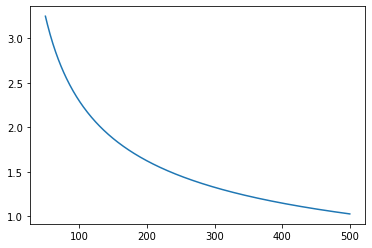

In [159]:
plt.plot(x, std_tot / x**0.5)
for i in sample_lens:
    if (std_tot / np.sqrt(i)) <= 1.5:
        print(i)
        break